## Import Libraries

In [1]:
%matplotlib inline

import copy
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
    <h1><center><strong>⁉️ Problem Introduction</strong></center></h1>
    <p>The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
        
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
    </p>
    <hr>
    <p>
We have been asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)
    </p>
</div>

<div class="alert alert-warning">  
<h3><strong>1. Collect & Load Data</strong></h3>
</div>

In [2]:
# import gender_submission, train dataset and predict datasets using pandas 'read_csv' function
df_train = pd.read_csv('./datasets/train.csv')
df_predict = pd.read_csv('./datasets/test.csv')

In [3]:
# for data exploration and analysis we will create a deep copy of out train dataset
df_eda = copy.deepcopy(df_train)

#### 1.1 Peek into imported datasets

In [4]:
df_eda.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### 1.2 Definition of dataset

In [5]:
data_definition = {'Variable':['survival', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
                   'Definition':['survival', 'Ticket class', 'Sex', 'Age in years', '# of siblings / spouses aboard the Titanic', \
                                 '# of parents / children aboard the Titanic', 'Ticket number', 'Passenger fare', 'Cabin number', 'Port of Embarkation'],
                   'Key':['0 = No, 1 = Yes', '1 = 1st, 2 = 2nd, 3 = 3rd', 'Male or Female', \
                          'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'C = Cherbourg, Q = Queenstown, S = Southampton']}

pd.DataFrame.from_dict(data_definition)

,Variable,Definition,Key
0,survival,survival,"0 = No, 1 = Yes"
1,Pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,Sex,Sex,Male or Female
3,Age,Age in years,NaN
4,SibSp,# of siblings / spouses aboard the Titanic,NaN
5,Parch,# of parents / children aboard the Titanic,NaN
6,Ticket,Ticket number,NaN
7,Fare,Passenger fare,NaN
8,Cabin,Cabin number,NaN
9,Embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


- `gender_submission` dataset only has 2 columns `PassengerId` and `Survived`. PassengerId kind of act as `key` which is connecting all three datasets.
- `train` dataset has 12 columnns which contains details about passengers with observed value of 'Survived' label.
- `predict` dataset all 11 columns as in `train` dataset except `survived` column, which also makes sense as we are required to predict `survived` label for given observations in the predict dataset.

<div class="alert alert-warning">  
<h3><strong>2. Exploratory Data Analysis</strong></h3>
</div>

> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to xxx hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Before starting out data exploration and analysis part, first we can define important configurations for Pandas, Seaborn, or Matplotlib we will be using.

#### 2.2 Parameters Configuration

**Matplotlib Parameters**

In [6]:
# Consistent plots
from pylab import rcParams

rcParams['figure.figsize'] = 10,5
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['axes.labelsize'] = 10
rcParams['axes.grid.axis'] = 'y'
rcParams['grid.linestyle'] = '--'
rcParams['grid.alpha'] = '0.4'

**Color palette**

In [7]:
# set color mapping to sequential color palette
cmap = 'PuBu'

In [8]:
# set color palette to discrete color palette 
customPalette = sns.color_palette('Pastel1')
sns.set_palette(sns.color_palette(customPalette))

In [9]:
customPalette

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

**Font size and font family**

In [10]:
sns.set_theme(style='whitegrid', font='serif')

In [11]:
fig_title_prop = {'size': 18, 'color': '#4a4a4a', 'fontweight':'bold'}

In [12]:
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 2.5})

<br>

#### 2.2 Dataset Exploration

Before delving into analysis let's make sure that our data is in tidy format. 

Conditions to check if **data is tidy**:
- Is every column a variable? ✅
- Is every row an observation? ✅
- Is every table a single observational unit? ✅

Now we can start exploring our dataset.

From the given `Problem Statement` and `train` dataset, we can identify our `Predictor` and `Target` variables:
- Predictor Variables : Pclass, Gender, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
- Target Variable : Survived

Lets expolore `train` dataset:

**Size of the dataset**

In [13]:
df_train.shape

(891, 12)

we have 12 columns (11 features + 1 target) and 890 observations.

In [14]:
datadict = pd.DataFrame()
datadict['dtype'] = df_eda.dtypes
datadict['count'] = df_eda.count()
datadict['missing_val'] = df_eda.isnull().sum()
datadict['missing_per'] = round(datadict['missing_val'] / datadict['count'], 2)
datadict['nunique'] = df_eda.nunique()

In [15]:
datadict.sort_values(by=['dtype', 'missing_per'], ascending=False)
datadict.style.background_gradient(cmap=cmap) 

,dtype,count,missing_val,missing_per,nunique
PassengerId,int64,891,0,0.000000,891
Survived,int64,891,0,0.000000,2
Pclass,int64,891,0,0.000000,3
Name,object,891,0,0.000000,891
Sex,object,891,0,0.000000,2
Age,float64,714,177,0.250000,88
SibSp,int64,891,0,0.000000,7
Parch,int64,891,0,0.000000,7
Ticket,object,891,0,0.000000,681
Fare,float64,891,0,0.000000,248


- Most of the data is numerical, 7 columns are numerical type and 5 are object / str type. 
- Some data is missing for columns `Age` and `Cabin`

#### Descriptive Statitics Summary

In [16]:
# get discripte statistcs on "object" datatypes
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elias, Mr. Tannous",male,1601,G6,S
freq,1,577,7,4,644


- `Cabin` has missing data for around 77% of the rows, this could cause bais in the model so we will drop this column later.
- `Age` column has 20% missing data, we will replace missing values with `mean` or 'median` depending upon the distribution of data
- `Embarked` has missing data for 2 rows, we will drop these 2 rows

In [17]:
# get discriptive statistcs on "number" datatypes
subset=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survival rate is 38%
- Mean age of passengers is 30 years, around 75% passengers are below38 years. Some data is missing for Age column.
- Maximum fare is 512, whie 75% passengers's fare is around 31. Most of passengers must be travelling with lower class tickets. Also this suggests that there might be some outliers.

#### Univariate Analysis

Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable. Univariate Analysis is thought to be one of the simplest forms of data analysis as it doesn't deal with causes or relationships, like a regression would. Primarily, Univariate Analysis simply takes data and provides a summary and associated patterns. 

In [18]:
survive_per = df_eda['Survived'].value_counts(normalize=True)

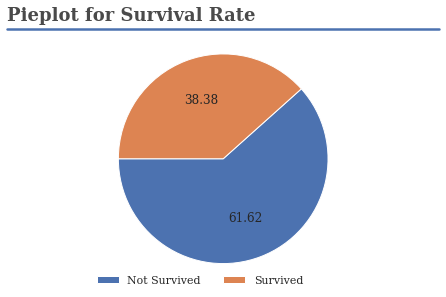

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

survive_per.plot(kind='pie', 
                 autopct='%.2f',
                 labels=None,
                 startangle = 180)

ax.set(ylabel='')

# add horizontal line
line = lines.Line2D([0, 1], [0.95, 0.95], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

# add figure text
fig.text(0, 0.98, 'Pieplot for Survival Rate', fontdict=fig_title_prop)

plt.legend(labels=['Not Survived', 'Survived'], loc=(0,0), edgecolor='None', ncol=2, bbox_transform=True)
plt.tight_layout()
plt.show()

Out of 891 passengers, only 38% survived, while majority 61% the passenger did not survive the disaster.

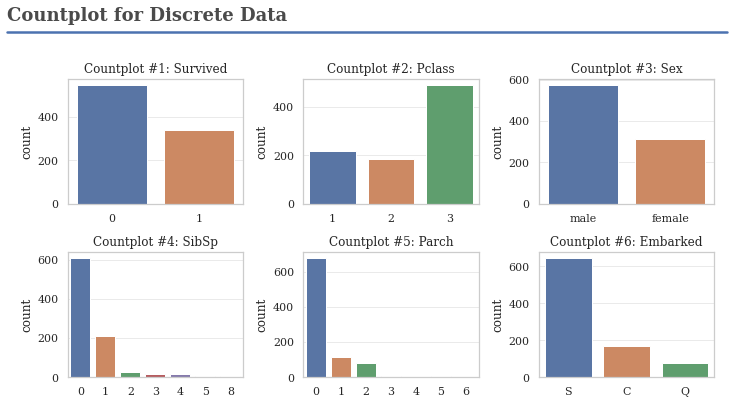

In [20]:
col_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
sub_count = 1

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
fig.subplots_adjust(hspace=0.5)
# fig.suptitle('Countplot for Discrete Data', fontsize=15, fontweight=200)

for ax, feature in zip(axes.flatten(), df_eda[col_names].columns):
    ax.set(title='Countplot #{}: {}'.format(sub_count, feature))
    ax.xaxis.label.set_visible(False)
    sns.countplot(df_eda[feature],ax=ax)
    sub_count += 1

# add horizontal line
line = lines.Line2D([0, 1], [1.05, 1.05], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

fig.text(0, 1.08, 'Countplot for Discrete Data', fontdict=fig_title_prop)

plt.tight_layout()
plt.show()

💡 Tip: In case we want to create multiple `displot` we won't be able to do so with same for loop method as above, why?
- [Difference between displot vs histplot](https://stackoverflow.com/a/63895570/8390360)
- [How to create multiple displot in same figure](https://stackoverflow.com/a/63974061/8390360)

In [21]:
def triple_plot(data, title, c):
    fig, ax = plt.subplots(3,1,figsize=(12,6),sharex=True)
        
    # add distribution plot
    sns.distplot(data, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    
    # add box plot
    sns.boxplot(data, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    
    # add voilin plot
    sns.violinplot(data, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    
    # add figure title line
    line = lines.Line2D([0, 1], [1, 1], transform=fig.transFigure, zorder=1000, figure=fig)
    fig.lines.extend([line])
    
    # add title
    fig.text(x=0, y=1.03, s=title, fontdict=fig_title_prop)
     
    plt.tight_layout(pad=3.0)
    plt.show()

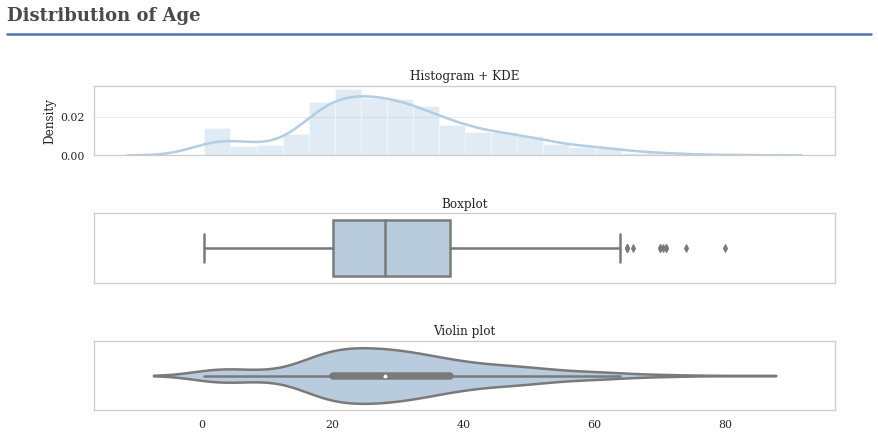

In [22]:
triple_plot(df_eda['Age'], 'Distribution of Age', customPalette[1])

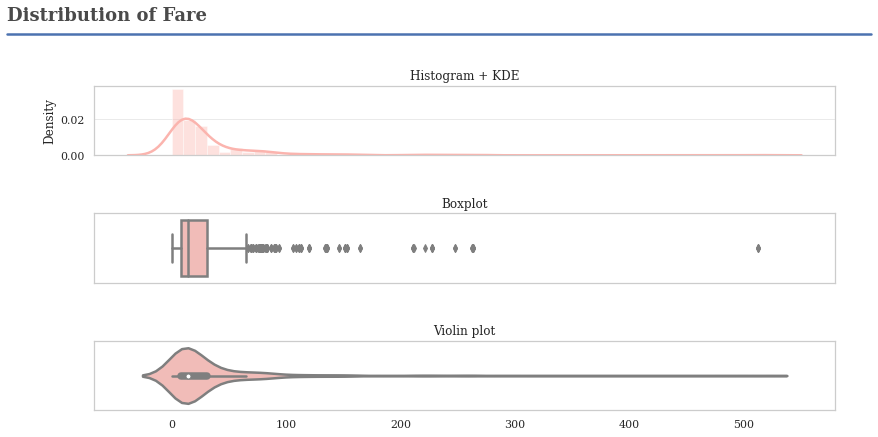

In [23]:
triple_plot(df_eda['Fare'], 'Distribution of Fare', customPalette[0])

Form these 2 plots we can gather that :
- For `Age` feature data is fairly normally distributed while `Fare` has high skewness which could be due to outlers. Next we will take a look at skewness and kurtosis for both `Age` and `Fare'
- From boxplot it is clear `Fare` feature has some high value outliers, we will check what are these outliers and what should we do with them.
- Also it is clear that most of `Fare` data is concentrated towards less values which indicates and also confirms that majority of people onboard purchased cheap tickets and thus there were more passengers with 3rd Class tickets, we can confirm this by checking correlation between `Fare` and `Pclass` features.

Let's check the values count of both `Age` greater than 100 and `Fare` greater than 300.

💡 Tip: `value_counts()` is a Series method as doesn't apply on DataFrame. If we have to apply it on DataFrame then we have to first flatten() the DataFrame and then use `pd.value_counts(flattened DataFrae)` method. 

In [24]:
pd.value_counts(df_eda[df_eda['Age'] > 80]['Age'].values.flatten()).sum()

0

In [25]:
pd.value_counts(df_eda[df_eda['Fare'] > 300]['Fare'].values.flatten()).sum()

3

* There is no passenger above 80
* There are 3 passengers whose fare is greater than 300

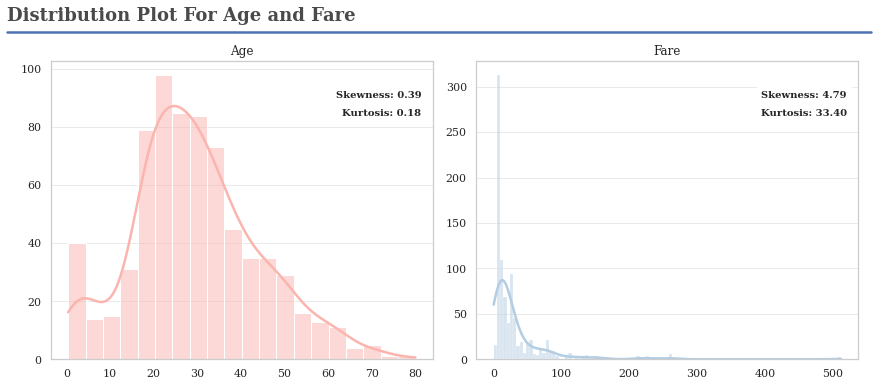

In [26]:
data = df_eda[['Age', 'Fare']]

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for ax, feature, color in zip(ax.flatten(), data.columns, customPalette[:2]):
    g = sns.histplot(data[feature], kde=True,ax=ax, color = color)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.set(title = '{}'.format(feature))
    ax.text(x=0.97, y=0.90, transform=ax.transAxes, s="Skewness: %.2f" % data[feature].skew(),
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
            backgroundcolor='white')
    ax.text(x=0.97, y=0.84, transform=ax.transAxes, s="Kurtosis: %.2f" % data[feature].kurt(),
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
        backgroundcolor='white')

# add horizontal line
line = lines.Line2D([0, 1], [1, 1], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

# add figure text as title
fig.text(0, 1.03, 'Distribution Plot For Age and Fare', fontdict=fig_title_prop)

plt.tight_layout()
plt.show()

Based on skewness and kurtosis values for `Age` column we can say that data is faily normally distributed while for `Fare` column we can say data is highly positvely skwed and also has presensce of outliers as kurtosis is very high.

We will check the characterstics of outlier's values in `Fare` feature based on which we will decide action in feature engineering section.

### Multivariate Analysis

Multivariate data analysis is a set of statistical models that examine patterns in multidimensional data by considering, at once, several data variables. It is an expansion of bivariate data analysis, which considers only two variables in its models.

In [27]:
# create correlation matrix 
corr = df_eda.corr()
corr.style.background_gradient(cmap=cmap)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


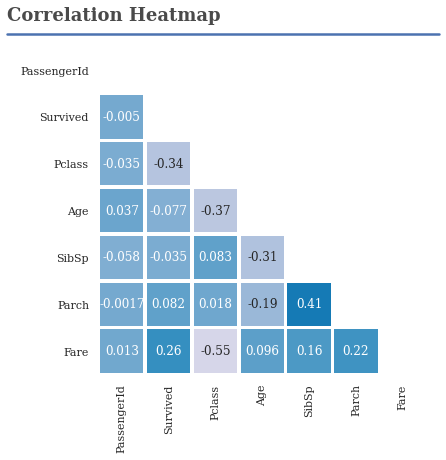

In [28]:
# create figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

# define mask to hide the upper triangle of the heatmap 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # define cmap for color mapping
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# rotate x axis ticks to 90 deg and y axis to 0 degree, set font size to 11 px
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_xticklabels(), rotation = 0, fontsize=11)

# create heatmap plot
g = sns.heatmap(corr, 
                mask=mask,
                vmin=-1, vmax=1,
                linewidth=2.5,
                annot=True,
                cmap=cmap,
                cbar=False,
                ax=ax)

# add horizontal line
line = lines.Line2D([0, 1], [1, 1], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

# add figure text as title
fig.text(0, 1.03, 'Correlation Heatmap', fontdict=fig_title_prop)

plt.tight_layout()
plt.show()

From Correlation heatmap it is evident that: 
- `Fare` and `Survived` are positively correlated.
- There is positive correlation between `Parch` and `SibSp`
- There is negative correlation between `Fare` and `Pclass`, this again confirms that most of people had bought low fare tickets and thus more passengers had 3rd class tickets.
- There is also negative correlation between `Pclass` and `Survive`, from this we can infer that lower that class (1 > 2 > 3) low were the chances of survival but we need to validate this.

What does positive and negative correlation means?
- **Positive Correlation:** This occurs when the value of one variable increases then the value of the other variable(s) also increases.
- **Negative Correlation:** This occurs when the value of one variable increases and the value of other variable(s) decreases.

Let's look deeper into survival rate and its relationship with other feature.
1. Find survival rate based on `sex`
2. Find survival rate based on `age band` for this we will have to populate our dataframe with age ranges (bin size = 10) based on the age of the passengers.
3. Check survival rate based on `class`.

Survival rate based on Sex

Groupby `Sex` feature and find percentage of `Survived`. Since Survived data is in 0 or 1 therefore aggregation as `mean()` is sufficient to find percentage.

In [29]:
survival_rate = pd.DataFrame(df_eda.groupby('Sex').mean()['Survived'])
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

In [30]:
"""
np.random.uniform() generates random samples from uniform distribution and returns the random samples as numpy array.

Parameters for this method are low=0.0, high=1.0, size=None
"""

male_pos = np.random.uniform(0, male_rate, len(df_eda[(df_eda['Sex'] == 'male') & (df_eda['Survived'] == 1)]))
male_neg = np.random.uniform(male_rate, 1, len(df_eda[(df_eda['Sex'] == 'male') & (df_eda['Survived'] == 0)]))
female_pos = np.random.uniform(0, female_rate, len(df_eda[(df_eda['Sex'] == 'male') & (df_eda['Survived'] == 1)]))
female_neg = np.random.uniform(female_rate, 1, len(df_eda[(df_eda['Sex'] == 'male') & (df_eda['Survived'] == 0)]))

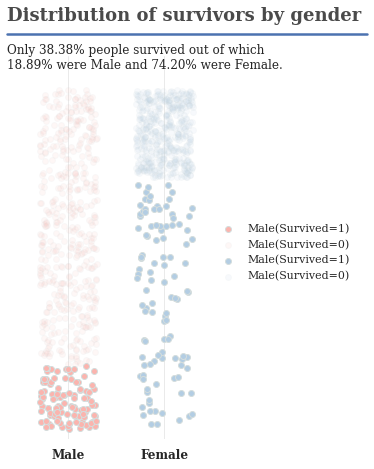

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color=customPalette[0], edgecolor='#d4dddd', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color=customPalette[0], edgecolor='#d4dddd', alpha=0.1, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color=customPalette[1], edgecolor='#d4dddd', label='Male(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color=customPalette[1], edgecolor='#d4dddd', alpha=0.1, label='Male(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontsize=12)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# remove figure borders
for s in ["top", "right","left", 'bottom']:
    ax.spines[s].set_visible(False)

# add horizontal line
line = lines.Line2D([0, 1], [1.02, 1.02], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

# add figure text as title
fig.text(0, 1.05, 'Distribution of survivors by gender', fontdict=fig_title_prop)
fig.text(0, 0.94, 
         'Only {:.2f}% people survived out of which\n{:.2f}% were Male and {:.2f}% were Female.'.format(
             survive_per[1]*100, 
             male_rate[0]*100, 
             female_rate[0]*100),
         ha='left'
        )

ax.legend(loc=(1, 0.4), edgecolor='None')
plt.grid()
plt.tight_layout()
plt.show()

Survival rate based on age of the passengers

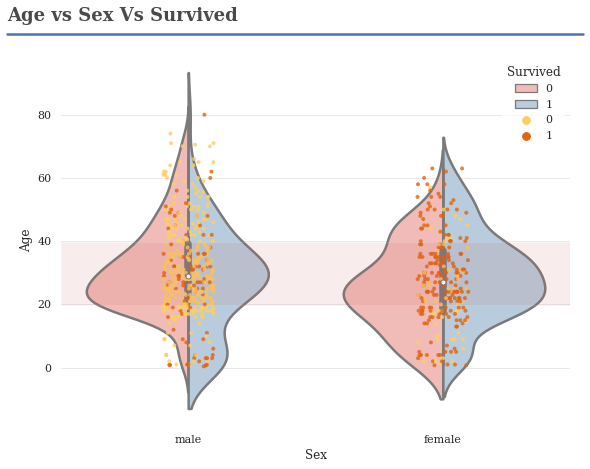

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)

sns.stripplot(x="Sex", y="Age", hue='Survived', data=df_eda, size=4, palette='YlOrBr', alpha=0.8)

sns.violinplot(x='Sex', y='Age', data=df_eda, hue='Survived', split=True, palette=customPalette)


# remove borders
for s in ['top', 'right', 'left', 'bottom']:
    ax.spines[s].set_visible(False)

# add horizontal line
line = lines.Line2D([0, 1], [1.02, 1.02], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

# add figure text as title
fig.text(0, 1.05, 'Age vs Sex Vs Survived', fontdict=fig_title_prop)  

# add span
ax.axhspan(xmin=0, xmax=1, 
           ymin=df_eda['Age'].mean() - 10, ymax=df_eda['Age'].mean() + 10 ,
           facecolor="r",
           alpha=0.1, 
           zorder=1000)

plt.legend(title='Survived', edgecolor='None', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

- For male between the age range of 20-30 years, chances of survial are low
- For female data is faily distributed throughout the y axis

First we will create a function to convert passenger age into a range.

In [33]:
# define funcction for converting age into age band
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

Now we will populate out df_eda dataset with age ranges based on passenger age. 

In [34]:
# add column in df_eda dataframe for age_band
df_eda['age_band'] = df_eda['Age'].apply(age_band)

Calculate surviaval rate for each age groups. Since our `age_band` feature  and aggregated data has some NaN values, thus we will use fillna() and replace NaN with zeros.

In [35]:
titanic_age = df_eda[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack()
titanic_age.fillna(0, inplace=True)
titanic_age['Survival rate'] = round(titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100, 2)

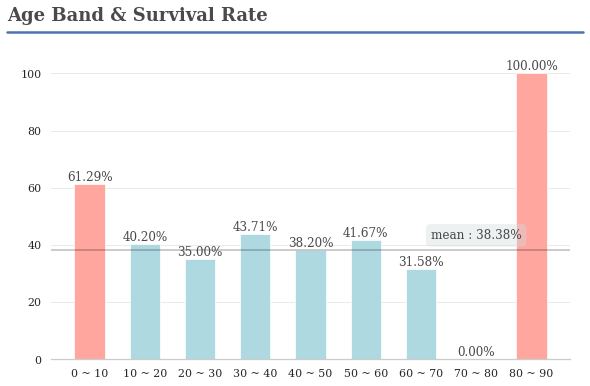

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
fig.subplots_adjust(top=0.8)

color_map = ['#aed9e0' for _ in range(9)]
color_map[0] = color_map[8] = '#ffa69e' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
#        edgecolor='black', 
       linewidth=0.7)
ax.set_ylim(0, 110)

for s in ["top", "right","left"]:
    ax.spines[s].set_visible(False)

# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

# mean line + annotation
mean = df_eda['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='-')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 5),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#d4dddd', linewidth=0, alpha=0.4))

# add horizontal line
line = lines.Line2D([0, 1], [1, 1], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

# add figure text as title
fig.text(0, 1.03, 'Age Band & Survival Rate', fontdict=fig_title_prop)

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
# ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

From the analysis we can infer that:
1. There is 100% survival rate for age band 80-90, but there was only 1 passenger in this range. We will try to eliminate this row as it can affect our model. Also does ticket class has any impact on his survival?
2. There is no one in age range 70-80 who survived. Find out were they all in 3rd Class?
3. Passengers with age range between 0-10 years has best survival rate, it also makes sense as protection of kids and women must have been priority.
4. Old people had less chance of survival while for young passenger age range 20-30 is exception as their survival rate is lower than mean. Why?

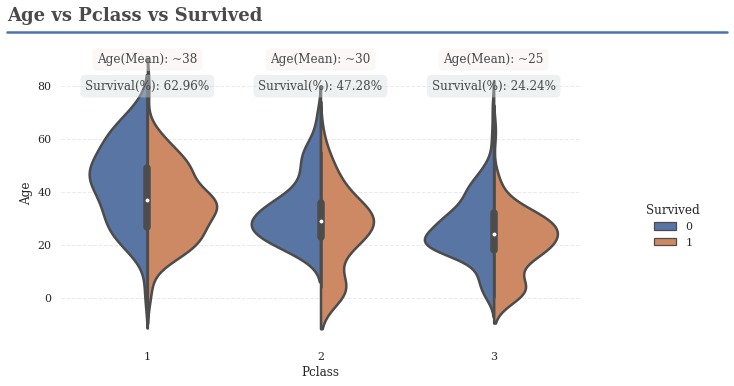

In [37]:
# mean age for each class
pclass_age_mean = df_eda[['Age', 'Pclass']].groupby('Pclass').mean()
pclsas_survival_rate = df_eda[['Survived', 'Pclass']].groupby(['Pclass']).mean()

# create figure
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True, data=df_eda)
    
for i in ['top', 'right', 'left', 'bottom']:
    ax.spines[i].set_visible(False)

# mean line + annotation
for i in range(len(pclass_age_mean)):
    ax.annotate("Age(Mean): ~{:.0f}".format(pclass_age_mean['Age'].iloc[i]), 
            xy=(i, 90),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#f8edeb', linewidth=0, alpha=0.4))
    ax.annotate("Survival(%): {:.2f}%".format(pclsas_survival_rate['Survived'].iloc[i]*100), 
            xy=(i, 80),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#d4dddd', linewidth=0, alpha=0.4))

line = lines.Line2D([0,1], [1,1], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

fig.text(0, 1.03, 'Age vs Pclass vs Survived', fontdict=fig_title_prop)

ax.legend(title='Survived', edgecolor='None', numpoints=1, markerscale=5, bbox_to_anchor=(1.25, 0.5)) 
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

From the above chart it is clear that:
1. Class 3 has most of Class 3 has the lowest mean age (~ 25 years) and lowest survival rate (~ 24%) of all three class
2. Class 1 has highest mean age (~ 38 years) and survival rate (~ 63%) of all three classes 

Survival rate vs Fare

In [38]:
pclass_ulist = list(range(df_eda['Pclass'].nunique()))
sex_ulist = list(df_eda['Sex'].unique())

class_gen = {'Pclass':[], 'Sex':[], 'Count':[], 'Count_per': [], 'Mean_Fare':[]}

for i in pclass_ulist:
    for j in sex_ulist:
        count = df_eda[(df_eda['Pclass'] == i+1) & (df_eda['Sex'] == j)]['Name'].count()
        mean_fare = df_eda[(df_eda['Pclass'] == i+1) & (df_eda['Sex'] == j)]['Fare'].mean()
        class_gen['Pclass'].append(i+1)
        class_gen['Sex'].append(j)
        class_gen['Count'].append(count)
        class_gen['Count_per'].append(round(count / len(df_eda) * 100, 2))
        class_gen['Mean_Fare'].append(round(mean_fare, 2))
        
pd.DataFrame.from_dict(class_gen).style.background_gradient(cmap='PuBu')

,Pclass,Sex,Count,Count_per,Mean_Fare
0,1,male,122,13.690000,67.230000
1,1,female,94,10.550000,106.130000
2,2,male,108,12.120000,19.740000
3,2,female,76,8.530000,21.970000
4,3,male,347,38.950000,12.660000
5,3,female,144,16.160000,16.120000


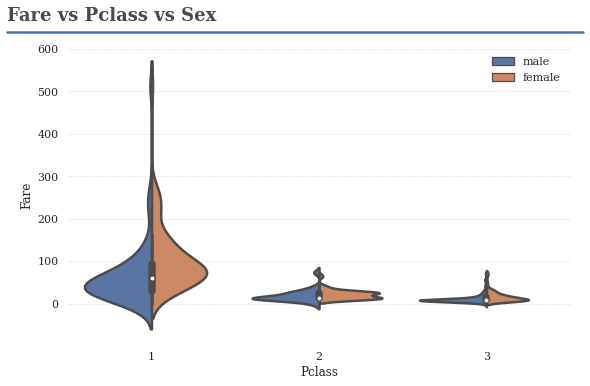

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.violinplot(y='Fare', x='Pclass', hue='Sex', data=df_eda, split=True)

for s in ['top', 'right', 'left', 'bottom']:
    ax.spines[s].set_visible(False)

line = lines.Line2D([0,1], [1,1], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

fig.text(0, 1.03, 'Fare vs Pclass vs Sex', fontdict=fig_title_prop)

ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(edgecolor='None')
plt.tight_layout()

In [40]:
data = df_eda[['SibSp', 'Survived', 'Sex', 'PassengerId']].groupby(by=['Sex', 'Survived', 'SibSp']).count().reset_index()
data.rename(columns={'PassengerId':'Count'}, inplace=True)
male_sibsp = df_eda[df_eda['Sex']=='male'][['SibSp', 'Sex', 'Survived']]
female_sibsp = df_eda[df_eda['Sex']=='female'][['SibSp', 'Sex', 'Survived']]

In [41]:
sibsp_sex = [male_sibsp, female_sibsp]

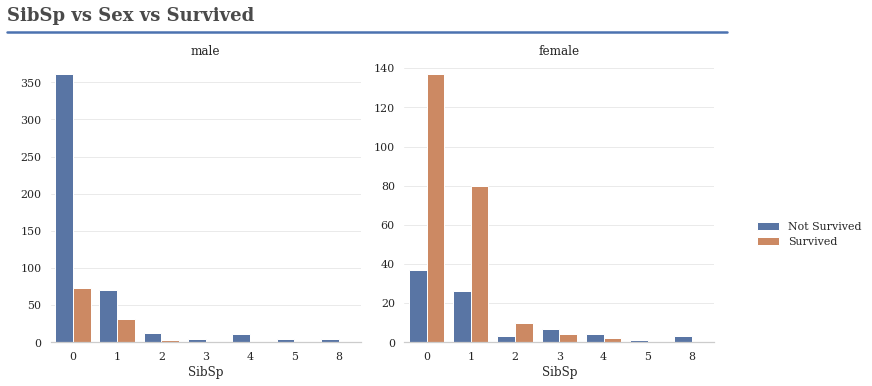

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for ax, data in zip(ax, sibsp_sex):
    sns.countplot(data=data, x='SibSp', hue='Survived', ax=ax)
    ax.yaxis.label.set_visible(False)
    ax.set(title='{}'.format(data['Sex'].value_counts().index[0]))
    ax.get_legend().remove()
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

line = lines.Line2D([0,1], [1,1], transform=fig.transFigure, zorder=1000, figure=fig)
fig.lines.extend([line])

fig.text(0, 1.03, 'SibSp vs Sex vs Survived', fontdict=fig_title_prop)

fig.legend(labels=['Not Survived', 'Survived'], edgecolor='None', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()

Conclusions so far:
- Only 38% passengers survived, Survival rate for female is way higher than male << Survival Rate {Male = 19%, Female = 72%} >>
- Fare of 3rd Class was very cheap << Mean fares {1st Class = 13,  2nd Class = 20,  3rd Class = 84} >>
- Majority of passengers were travelling through 3rd Class << Population Percentage {1st Class = 24%, 2nd Class = 20%, 3rd Class = 55%} >>
- Majority of passengers travelling thorugh 3rd class were male (~38%)
- Majority of passengers travelling were young (between 20 to 40 years = ~33%), 14% were travelling through 3rd Class

<div class="alert alert-warning">  
<h3><strong>Feature Engineering</strong></h3>
</div>

In [43]:
#  Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Model selector
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

>The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.
— Luca Massaron

Feature engineering efforts mainly have two goals:
1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
2. Improving the performance of machine learning models.

In [44]:
train_copy = copy.deepcopy(df_train)
predict_copy = copy.deepcopy(df_predict)

#### Cleaning The Data

We will create a list and pass both train and predict datasets, so that we can use for loop to apply feature engineering operations on both datasets at once.

In [45]:
df_list = [train_copy, predict_copy]

Let's graphically visualize the missing values in the train dataset

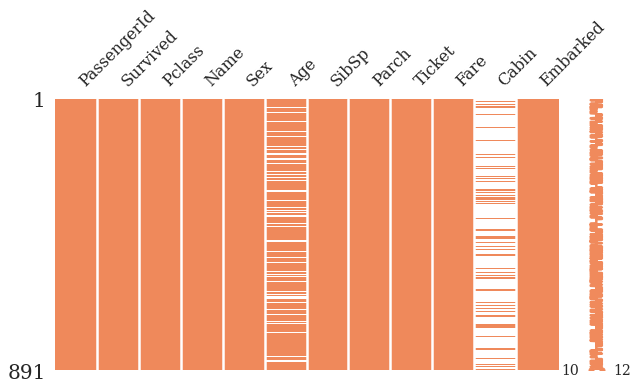

In [46]:
msno.matrix(train_copy, color=(0.94, 0.54, 0.36), figsize=(10,5))
plt.show()

#### COMPLETING : Complete missing values in train and predict dataset

Replace missing values in:
- In `Age` and `Fare` column with median as data present is numerical and positively skewed
- In `Embarked` column with mode as data present is categorical

In [47]:
for dataset in df_list:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

Drop unhelpful columns from `predict` dataset: 
- Drop `Cabin` column as most of data in this column is missing
- Drop `PassengerId` and `Ticket` columns as they does not contribute in analysis

But before dropping `PassengerId` from `test` column, we will save it as a list because we will need it to for submission.

In [48]:
passengerid = predict_copy['PassengerId']

In [49]:
drop_column = ['PassengerId','Cabin', 'Ticket']
predict_copy.drop(drop_column, axis=1, inplace = True)

In [50]:
print(f'Train Dataset has %.f columns: ' % len(train_copy.columns), list(df_train.columns))
print('-------'*20)
print(f'predict Dataset has %.f columns: ' % len(predict_copy.columns), list(df_predict.columns))

Train Dataset has 12 columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
--------------------------------------------------------------------------------------------------------------------------------------------
predict Dataset has 8 columns:  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [51]:
print(
    'Train dataset has {} missing values\npredict dataset has {} missing values'.format(
        np.sum(train_copy.isnull().sum()), 
        np.sum(predict_copy.isnull().sum())) 
)

Train dataset has 687 missing values
predict dataset has 0 missing values


#### CREATE: Feature Engineering for train and predict dataset

Create/add new columns for `familySize`, `isAlone`, `nameTitle`, `fareBin`, `ageBin`

In [52]:
for dataset in df_list:
    #Discrete variables
    dataset['familySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    
    # retrun 1/yes if familySize < 1 and 0/no if familySize > 1
    dataset['isAlone'] = dataset.apply(lambda x: 0 if (x['familySize'] > 1) else 1, axis=1)

    # we will use regex to extract title from `Name` column
    dataset['nameTitle'] = dataset['Name'].str.extract('([a-zA-Z]+\.)', expand=True)[0].str.replace('.', '')
    
    # create fare and bin using qcut
    dataset['fareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['ageBin'] = pd.cut(dataset['Age'].astype(int), 5)

Convert title values in `nameTitle` column to `Others` if any title has less than 10 instances.

In [53]:
stat_min = 10

for dataset in df_list:
    title_names = (dataset['nameTitle'].value_counts() < stat_min) #this will create a true false series with title name as index
    dataset['nameTitle'] = dataset['nameTitle'].apply(lambda x: 'Others' if title_names.loc[x] == True else x)
    print(dataset['nameTitle'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: nameTitle, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: nameTitle, dtype: int64


In [54]:
print(f'Train Dataset has %.f columns: ' % len(train_copy.columns), list(train_copy.columns))
print('-------'*20)
print(f'Prediction Dataset has %.f columns: ' % len(predict_copy.columns), list(predict_copy.columns))

Train Dataset has 17 columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'familySize', 'isAlone', 'nameTitle', 'fareBin', 'ageBin']
--------------------------------------------------------------------------------------------------------------------------------------------
Prediction Dataset has 13 columns:  ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'familySize', 'isAlone', 'nameTitle', 'fareBin', 'ageBin']


#### CONVERT: Convert categorical values into numerical using Label Encoder for train and predict dataset

There are various methods for converting categorical values in a column to numerical, some of important ones are mentioned below:

- **Label Encoding:** It is simply converting each value in a column to a number. Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms.

- **One-Hot Encoding:** In this strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

- **Custom Binary Encoding:** Depending on the data set, you may be able to use some combination of label encoding and one hot encoding to create a binary column that meets your needs for further analysis.

##### Label Encoding

In [55]:
# initialize LabelEncoder from Preprocessing module of Scikit-Learn
label = LabelEncoder()

# apply label encoding to `Sex`, `Embarked`, `nameTitle`, `ageBin`, `fareBin`
for dataset in df_list:    
    dataset['sexCode'] = label.fit_transform(dataset['Sex'])
    dataset['embarkedCode'] = label.fit_transform(dataset['Embarked'])
    dataset['nameTitleCode'] = label.fit_transform(dataset['nameTitle'])
    dataset['ageBinCode'] = label.fit_transform(dataset['ageBin'])
    dataset['fareBinCode'] = label.fit_transform(dataset['fareBin'])

In [56]:
print(f'Train Dataset has %.f columns: ' % len(train_copy.columns), list(train_copy.columns))
print('-------'*20)
print(f'Prediction Dataset has %.f columns: ' % len(predict_copy.columns), list(predict_copy.columns))

Train Dataset has 22 columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'familySize', 'isAlone', 'nameTitle', 'fareBin', 'ageBin', 'sexCode', 'embarkedCode', 'nameTitleCode', 'ageBinCode', 'fareBinCode']
--------------------------------------------------------------------------------------------------------------------------------------------
Prediction Dataset has 18 columns:  ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'familySize', 'isAlone', 'nameTitle', 'fareBin', 'ageBin', 'sexCode', 'embarkedCode', 'nameTitleCode', 'ageBinCode', 'fareBinCode']


#### SELECTION: Select `Features` and `Target` variables for train and predict dataset

In [57]:
# define y variable aka target
Target = ['Survived']

##### One-Hot Encoding

Using `get_dummy` method from Pandas to create one-hot encoding for categorical features 'Sex', 'nameTitle', 'Embarked'

In [58]:
dummy_cols = ['Sex', 'nameTitle', 'Embarked']
train_dummy = pd.get_dummies(train_copy[dummy_cols])
train_dummy_cols = train_dummy.columns.to_list()

In [59]:
predict_dummy = pd.get_dummies(predict_copy[dummy_cols])
predict_dummy_cols = train_dummy.columns.to_list()

Concatenate dummy data with train data (this will be unified source of processed data from which data can be extracted basis requirement)

In [60]:
train_copy = pd.concat([train_copy, train_dummy], axis=1)

In [61]:
predict_copy = pd.concat([predict_copy, predict_dummy], axis=1)

Prepare different versions of dataframe to test model - 
1. With label encoding data
2. With one-hot encoding data

In [62]:
# Target 
y = train_copy[Target]

In [63]:
## Original selected feature + Label encoding features
# column for label encoding data
train1_cols = ['Pclass', 'SibSp', 'Parch', 'sexCode', 'embarkedCode', 'nameTitleCode', 'ageBinCode', 'fareBinCode']
# dataframe for label encoding data
X1 = train_copy[train1_cols]

# columns for one-hot encoding data
train2_cols = ['Pclass', 'SibSp', 'Parch', 'ageBinCode', 'fareBinCode'] + train_dummy_cols
# dataframe for one-hot encoding data
X2 = train_copy[train2_cols]

In [64]:
predict_label = predict_copy[train1_cols]

In [65]:
predict_1hot = predict_copy[train2_cols]

#### SPLIT : Split the `train` dataset

We will use `df_predict` dataset for submission so we cannot show it to the model therefore we will split our `train` dataset into 80/20 ratio of `train` and `test` respectively.

In [66]:
# random_state -> seed or control random number generator
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y, test_size=0.2, random_state=42)

In [67]:
print('Train Dataset has {:.0f} examples, {:.2f}% of original.'.format(len(X1_train), round(len(X1_train) / len(X1) *100, 2)))
print('Test Datasets has {:.0f} examples, {:.2f}% of original.'.format(len(X1_test), round(len(X1_test) / len(X1) *100, 2)))

Train Dataset has 712 examples, 79.91% of original.
Test Datasets has 179 examples, 20.09% of original.


<div class="alert alert-warning">  
<h3><strong>Model Selection</strong></h3>
</div>

We will test different models and check for their accurary with both of our datasets.

Machine Learning Algorithm (MLA) Selection and Initialization

In [68]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    
    #XGBoost
    XGBClassifier()    
    ]

We will create a table and populate it with the accuracy data of algorithms so that we can compare thier porformance. We will create separate tables for label encoding and one-hot encoding. 

In [69]:
#create table to compare MLA metrics for label encoding data
MLA_cols_label = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare_label = pd.DataFrame(columns = MLA_cols_label)

In [70]:
#create table to compare MLA metrics for one-hot encoding data
MLA_cols_1hot = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare_1hot = pd.DataFrame(columns = MLA_cols_1hot)

Now let's loop through our selected algorithms and record their accuracy in respective tables. We will use `Stratified K Fold` method for cross validation.

- [What is Cross Validation?](https://en.wikipedia.org/wiki/Cross-validation_(statistics))
- [Different types of Cross Validations](https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/)

##### Model comparison for Label encoding data

In [71]:
# index through MLA and save performance to table
row_index = 0

for alg in MLA:
    # stratified K Fold Split
    skf = StratifiedKFold(n_splits = 10, random_state=10)
        
    # cross validation
    cv_results = model_selection.cross_validate(alg, X1_train, y1_train, return_train_score=True, cv=skf)
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare_label.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare_label.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    MLA_compare_label.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare_label.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare_label.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    MLA_compare_label.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    row_index+=1

In [72]:
MLA_compare_label.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare_label

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
5,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.838483,0.835642,0.219584,0.0587366
1,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.868134,0.816041,0.166998,0.328421
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.892947,0.809057,0.134167,0.189996
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.856584,0.80759,0.133569,0.00488524
8,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.889514,0.806201,0.134268,0.0858694
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892947,0.796381,0.141217,0.00568438
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.794787,0.78928,0.245636,0.218016
7,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.788858,0.785133,0.249081,0.00747969
3,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.792759,0.778091,0.209998,0.00478659


##### Model comparison for One-Hot encoding data

In [73]:
# index through MLA and save performance to table
row_index = 0

for alg in MLA:
    # stratified K Fold Split
    skf = StratifiedKFold(n_splits = 10, random_state=10)
        
    # cross validation
    cv_results = model_selection.cross_validate(alg, X2_train, y2_train, return_train_score=True, cv=skf)
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare_1hot.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare_1hot.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    MLA_compare_1hot.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare_1hot.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare_1hot.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    MLA_compare_1hot.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    row_index+=1

In [74]:
MLA_compare_1hot.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare_1hot

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
5,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.837859,0.835642,0.225995,0.0520613
7,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.83505,0.832825,0.21751,0.00508397
1,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.86751,0.831455,0.223514,0.260415
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.831461,0.818779,0.209165,0.473918
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.892947,0.816138,0.138765,0.276665
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.847991,0.810505,0.159061,0.00598347
8,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.88967,0.808979,0.133889,0.0632307
3,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.807272,0.806123,0.23466,0.0036901
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892947,0.789378,0.162934,0.00489285


Both `label` and `one-hot` encoding data suggests that SVC prrovides best accuracy score and almost identical for both scenarios. So we will use SVC and try to optimize with Hyperparameter tuning.

<div class="alert alert-warning">  
<h3><strong>Model Tuning & Evaluation</strong></h3>
</div>

But lets first evaluate our model without hyperparameter tuning.

In [75]:
# # train the model on train set 
# model = svm.SVC()
# model_1hot = model.fit(X2_train, y2_train) 
  
# # print prediction results 
# predictions_1hot = model.predict(X2_test) 
# print(classification_report(y2_test, predictions_1hot)) 

First lets define parameters grid which includes parameters and values we want to use to tune our model.

In [76]:
# defining parameters and values 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [77]:
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = False) 

In [78]:
# fitting the model for grid search 
grid.fit(X2_train, y2_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=False)

In [79]:
print(grid.best_params_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [80]:
print(grid.best_estimator_) 

SVC(C=100, gamma=0.01)


In [81]:
model_tuned = svm.SVC(C=100, gamma=0.01, kernel='rbf')
model_tuned.fit(X2_train, y2_train)
predict_tuned = model_tuned.predict(X2_test)
print(classification_report(y2_test, predict_tuned))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



There is not much change in metrics even after tuning. Recall score for 'Survived' people is only 0.74 which means out of all survived classes in the truth sample our model is only able to classify 74% of them as survived while rest 26% as 'not survived'

**Confusion Matrix** : It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

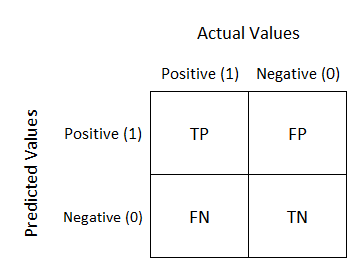

In [82]:
cm = confusion_matrix(y2_test, predict_tuned)
cm

array([[92, 13],
       [19, 55]], dtype=int64)

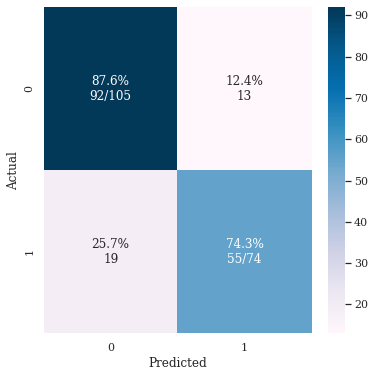

In [83]:
# Plot confusion matrix

def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= cmap, annot=annot, fmt='', ax=ax)
    
plot_cm(y2_test, predict_tuned)

We have higher rate of False Negative.

<div class="alert alert-warning">  
<h3><strong>Conclusion</strong></h3>
</div>

- Given the dataset, we are able to predict whether or not a passenger will survive the titanic disaster with accuracy of `83.56%`.
- We attempted to test and select best model highest accuracy for both `label` and `one-hot` encoding dataset.
- In both cases, Support Vector Machine outperformed rest of the models in terms of accuracy. LDA and GPC are closer to SVC for `one-hot` encoded dataset.
- Even after using `GridSearchCV` to tune SVC model, we were not able to improve the accuracy of our model.
- From confusion matrix it is clear that we have higher rate of `false negatives`.

[Class Imbalance Learning Method For SVM](http://www.cs.ox.ac.uk/people/vasile.palade/papers/Class-Imbalance-SVM.pdf)

<div class="alert alert-warning">  
<h3><strong>Submission</strong></h3>
</div>

In [84]:
test_prediction = model_tuned.predict(predict_1hot)
submission = pd.DataFrame({
    'PassengerId' : passengerid,
    'Survived': test_prediction
})

submission['PassengerId'] = submission['PassengerId'].astype(int)
submission['Survived'] = submission['Survived'].astype(int)

In [89]:
submission.to_csv("titanic_submission_20201129.csv", index=False)

Resources:
- https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic
- https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
- https://www.kaggle.com/ruchi798/break-the-ice
- https://www.kaggle.com/agungor2/various-confusion-matrix-plots
- https://trello.com/c/AUUdm4tq/35-kaggle-awesome-visualization-with-titanic-dataset%F0%9F%93%8A-subinum